In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

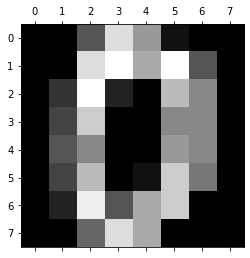

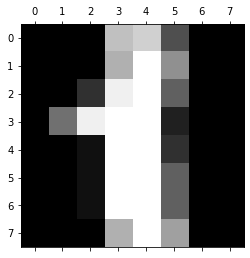

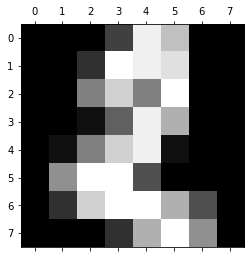

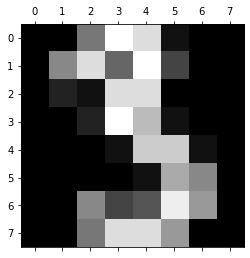

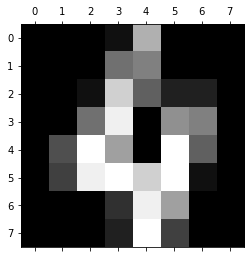

In [4]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [11]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [12]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [25]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators refer to the number of trees we are using, i.e. we will take majority votes from the result of these trees
rf = RandomForestClassifier(n_estimators=100) 
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
rf.score(x_test, y_test)

0.975

In [27]:
y_pred = rf.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  3,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 37]], dtype=int64)

Text(33.0, 0.5, 'Truth')

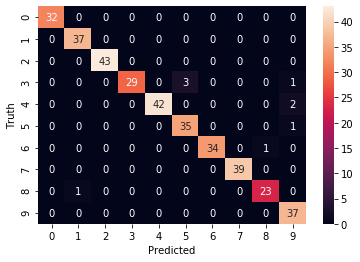

In [30]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")